In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
file_path='train.csv'
df=pd.read_csv(file_path)
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,NaN,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,NaN,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


In [3]:
path='test.csv'
df2=pd.read_csv(path)
df2.head()
# df2.isnull().sum()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,FDC15,CHUKWUDI049,FDC15_CHUKWUDI049,18.100,Low Fat,0.178246,Dairy,395.32,2006,Medium,Cluster 1,Supermarket Type1
1,NCY06,CHUKWUDI018,NCY06_CHUKWUDI018,15.250,Low Fat,0.061434,Household,327.49,2016,Medium,Cluster 3,Supermarket Type2
2,DRB24,CHUKWUDI035,DRB24_CHUKWUDI035,8.785,Low Fat,0.020573,Soft Drinks,391.16,2011,Small,Cluster 2,Supermarket Type1
3,NCG54,CHUKWUDI018,NCG54_CHUKWUDI018,12.100,Low Fat,0.080131,Household,427.28,2016,Medium,Cluster 3,Supermarket Type2
4,NCA42,CHUKWUDI017,NCA42_CHUKWUDI017,6.965,Low Fat,0.028710,Household,395.40,2014,NaN,Cluster 2,Supermarket Type1


In [4]:
df.describe(include='all')

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
count,3742,3742,3742,3141.000000,3742,3742.000000,3742,3742.000000,3742.000000,2616,3742,3742,3742.000000
unique,1367,10,3742,NaN,3,NaN,16,NaN,NaN,3,3,4,NaN
top,NCL31,CHUKWUDI017,FDF57_CHUKWUDI017,NaN,Low Fat,NaN,Snack Foods,NaN,NaN,Medium,Cluster 3,Supermarket Type1,NaN
freq,9,461,1,NaN,2272,NaN,563,NaN,NaN,1155,1438,2495,NaN
mean,NaN,NaN,NaN,12.870640,NaN,0.066613,NaN,391.815315,2004.778461,NaN,NaN,NaN,6103.735353
std,NaN,NaN,NaN,4.730432,NaN,0.052951,NaN,120.204222,8.276712,NaN,NaN,NaN,4456.169125
min,NaN,NaN,NaN,4.555000,NaN,0.000000,NaN,78.730000,1992.000000,NaN,NaN,NaN,83.230000
25%,NaN,NaN,NaN,8.630000,NaN,0.026971,NaN,308.392500,1994.000000,NaN,NaN,NaN,2728.120000
50%,NaN,NaN,NaN,12.600000,NaN,0.053517,NaN,393.910000,2006.000000,NaN,NaN,NaN,5374.675000
75%,NaN,NaN,NaN,17.100000,NaN,0.095094,NaN,466.480000,2011.000000,NaN,NaN,NaN,8524.737500


# Treating Missing Values

In [5]:
# df.isnull().sum()

# df2.isnull().sum()

#check the mode of the supermarket size values
# df['Supermarket _Size'].value_counts().idxmax()

# df2['Supermarket _Size'].value_counts().idxmax()

#replace the missing 'Supermarket_Size' values by the most frequent 
df["Supermarket _Size"].replace(np.nan, "Medium", inplace=True)
df2["Supermarket _Size"].replace(np.nan, "Medium", inplace=True)
df.Product_Weight=df.sort_values(['Product_Identifier','Product_Weight']).Product_Weight.ffill( )
df2.Product_Weight=df.sort_values(['Product_Identifier','Product_Weight']).Product_Weight.ffill( )

In [6]:
# group 'Product_Identifier', 'Product_Weight' by 'Product_Identifier' so as to replace nan with the mean
#of the corresponding 'Product_Identifier'
df_gptest = df[['Product_Identifier', 'Product_Weight']]
grouped_test1 = df_gptest.groupby(['Product_Identifier'],as_index=False).mean() 

In [7]:
df.sort_values(['Product_Identifier','Supermarket_Identifier']).head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
183,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1391,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2103,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
1719,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
2592,DRA12,CHUKWUDI045,DRA12_CHUKWUDI045,11.6,Low Fat,0.000000,Soft Drinks,354.04,2009,Medium,Cluster 2,Supermarket Type1,9572.54


In [8]:
df.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

# product that gives a better margin at specific stores

In [9]:
# grouped_1=df[['Product_Type','Supermarket_Identifier','Product_Supermarket_Sales']]
# grpd_1=grouped_1.groupby(['Product_Type','Supermarket_Identifier'],as_index=False).mean()
# grpd_1=grpd_1.sort_values(['Product_Type','Product_Supermarket_Sales'], ascending=False)
# grpd_1

In [10]:
# grouped_11=df[['Product_Type','Product_Supermarket_Sales']]
# grpd_11=grouped_11.groupby(['Product_Type'],as_index=False).sum()
# grpd_11=grpd_11.sort_values(['Product_Supermarket_Sales'], ascending=False)
# grpd_11

In [11]:
# grouped_pivot = grpd_1.pivot(index='Product_Type',columns='Supermarket_Identifier')
# grouped_pivot.head()

In [12]:
# fig, ax = plt.subplots()
# im = ax.pcolor(grouped_pivot, cmap='RdBu')

# #label names
# row_labels = grouped_pivot.columns.levels[1]
# col_labels = grouped_pivot.index

# #move ticks and labels to the center
# ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# #insert labels
# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(col_labels, minor=False)

# #rotate label if too long
# plt.xticks(rotation=90)

# fig.colorbar(im)
# plt.show()

# Supermarket Type analysis

In [13]:
grouped_2=df[['Supermarket_Type', 'Product_Supermarket_Sales']]
grpd_2=grouped_2.groupby(['Supermarket_Type'],as_index=False).mean()
grpd_2.sort_values('Product_Supermarket_Sales',ascending=False)

,Supermarket_Type,Product_Supermarket_Sales
3,Supermarket Type3,12541.373382
1,Supermarket Type1,6434.596537
2,Supermarket Type2,5588.015335
0,Grocery Store,821.426611


# Encoding

In [14]:
df['Supermarket_Type'].replace('Supermarket Type3',4, inplace=True)
df['Supermarket_Type'].replace('Supermarket Type1',3, inplace=True)
df['Supermarket_Type'].replace('Supermarket Type2',2, inplace=True)
df['Supermarket_Type'].replace('Grocery Store',1, inplace=True)
# df[['Supermarket_Type']]

df2['Supermarket_Type'].replace('Supermarket Type3',4, inplace=True)
df2['Supermarket_Type'].replace('Supermarket Type1',3, inplace=True)
df2['Supermarket_Type'].replace('Supermarket Type2',2, inplace=True)
df2['Supermarket_Type'].replace('Grocery Store',1, inplace=True)
# df2[['Supermarket_Type']]

In [15]:
# sns.boxplot(x="Supermarket_Type", y="Product_Supermarket_Sales", data=df)

In [16]:
# grpd_2=grouped_2.groupby(['Supermarket_Type'],as_index=False)
# f_val, p_val = stats.f_oneway(grpd_2.get_group('Supermarket Type1')['Product_Supermarket_Sales'], grpd_2.get_group('Supermarket Type2')['Product_Supermarket_Sales'], grpd_2.get_group('Supermarket Type3')['Product_Supermarket_Sales'], grpd_2.get_group('Grocery Store')['Product_Supermarket_Sales'])  
# print( "ANOVA results: F=", f_val, ", P =", p_val)   

In [17]:
# df['Supermarket_Type'].value_counts()

# Supermarket_Location_Type analysis

In [18]:
grouped_3=df[['Supermarket_Location_Type', 'Product_Supermarket_Sales']]
grpd_3=grouped_3.groupby(['Supermarket_Location_Type'],as_index=False).mean()
grpd_3

,Supermarket_Location_Type,Product_Supermarket_Sales
0,Cluster 1,4907.270494
1,Cluster 2,7581.598620
2,Cluster 3,5770.437719


# Encoding

In [19]:
df['Supermarket_Location_Type'].replace('Cluster 2',3, inplace=True)
df['Supermarket_Location_Type'].replace('Cluster 3',2, inplace=True)
df['Supermarket_Location_Type'].replace('Cluster 1',1, inplace=True)
# df['Supermarket_Location_Type'].value_counts()

df2['Supermarket_Location_Type'].replace('Cluster 2',3, inplace=True)
df2['Supermarket_Location_Type'].replace('Cluster 3',2, inplace=True)
df2['Supermarket_Location_Type'].replace('Cluster 1',1, inplace=True)
# df2['Supermarket_Location_Type'].value_counts()

In [20]:
# df['Supermarket_Location_Type'].value_counts()

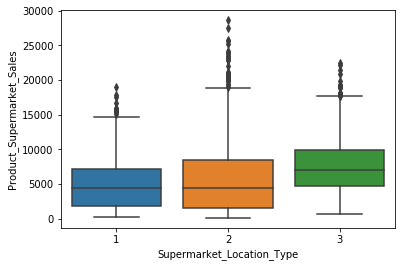

In [21]:
sns.boxplot(x="Supermarket_Location_Type", y="Product_Supermarket_Sales", data=df)

In [22]:
# grpd_3=grouped_3.groupby(['Supermarket_Location_Type'],as_index=False)
# f_val, p_val = stats.f_oneway(grpd_3.get_group('Cluster 1')['Product_Supermarket_Sales'], grpd_3.get_group('Cluster 2')['Product_Supermarket_Sales'], grpd_3.get_group('Cluster 3')['Product_Supermarket_Sales'])  
# print( "ANOVA results: F=", f_val, ", P =", p_val)   

# Product_Fat_Content analysis

In [23]:
df['Product_Fat_Content'].value_counts()

Low Fat          2272
Normal Fat       1341
Ultra Low fat     129
Name: Product_Fat_Content, dtype: int64

In [24]:
grouped_4=df[['Product_Fat_Content', 'Product_Supermarket_Sales']]
grpd_4=grouped_4.groupby(['Product_Fat_Content'],as_index=False).mean()
grpd_4

,Product_Fat_Content,Product_Supermarket_Sales
0,Low Fat,6038.504696
1,Normal Fat,6287.411447
2,Ultra Low fat,5343.226899


# Encoding

In [25]:
df['Product_Fat_Content'].replace('Low Fat',3, inplace=True)
df['Product_Fat_Content'].replace('Normal Fat',2, inplace=True)
df['Product_Fat_Content'].replace('Ultra Low fat',1, inplace=True)
# df['Product_Fat_Content'].value_counts()
df2['Product_Fat_Content'].replace('Low Fat',3, inplace=True)
df2['Product_Fat_Content'].replace('Normal Fat',2, inplace=True)
df2['Product_Fat_Content'].replace('Ultra Low fat',1, inplace=True)
# df2['Product_Fat_Content'].value_counts()

In [26]:
# sns.boxplot(x='Product_Fat_Content', y='Product_Supermarket_Sales', data=df)

In [27]:
# grpd_4=grouped_4.groupby(['Product_Fat_Content'],as_index=False)
# f_val, p_val = stats.f_oneway(grpd_4.get_group('Low Fat')['Product_Supermarket_Sales'], grpd_4.get_group('Normal Fat')['Product_Supermarket_Sales'], grpd_4.get_group('Ultra Low fat')['Product_Supermarket_Sales'])  
# print( "ANOVA results: F=", f_val, ", P =", p_val)   

# supermarket_size analysis

In [28]:
df['Supermarket _Size'].value_counts()

Medium    2281
Small     1015
High       446
Name: Supermarket _Size, dtype: int64

In [29]:
grouped_5=df[['Supermarket _Size', 'Product_Supermarket_Sales']]
grpd_5=grouped_5.groupby(['Supermarket _Size'],as_index=False).mean()
grpd_5

,Supermarket _Size,Product_Supermarket_Sales
0,High,3998.670359
1,Medium,6844.184498
2,Small,5364.715143


# Encoding

In [30]:
df['Supermarket _Size'].replace('Medium',3, inplace=True)
df['Supermarket _Size'].replace('Small',2, inplace=True)
df['Supermarket _Size'].replace('High',1, inplace=True)

df2['Supermarket _Size'].replace('Medium',3, inplace=True)
df2['Supermarket _Size'].replace('Small',2, inplace=True)
df2['Supermarket _Size'].replace('High',1, inplace=True)

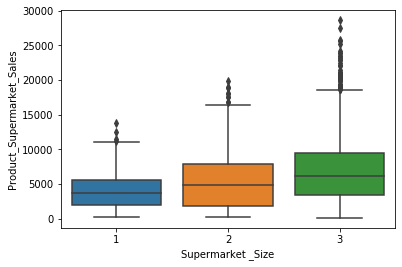

In [31]:
sns.boxplot(x='Supermarket _Size', y='Product_Supermarket_Sales', data=df)

In [32]:
# grpd_5=grouped_5.groupby(['Supermarket _Size'],as_index=False)
# f_val, p_val = stats.f_oneway(grpd_5.get_group('Medium')['Product_Supermarket_Sales'], grpd_5.get_group('Small')['Product_Supermarket_Sales'],grpd_5.get_group('High')['Product_Supermarket_Sales'])  
# print( "ANOVA results: F=", f_val, ", P =", p_val) 

# Product_Type analysis

In [33]:
df['Product_Type'].value_counts()

Snack Foods              563
Fruits and Vegetables    556
Household                414
Frozen Foods             334
Canned                   294
Dairy                    263
Baking Goods             259
Health and Hygiene       222
Meat                     202
Soft Drinks              193
Breads                   115
Hard Drinks               97
Others                    82
Starchy Foods             62
Breakfast                 54
Seafood                   32
Name: Product_Type, dtype: int64

# One hot encodiing of of top 11 product type

In [34]:
# rdf= [x for x in df.Product_Type.value_counts().sort_values(ascending=False).head(11).index]
# for label in rdf:
#     df['Product_Type'+ label]=np.where(df['Product_Type']==label,1,0)
# for label in rdf:
#     df2['Product_Type'+ label]=np.where(df2['Product_Type']==label,1,0)

In [35]:
type_count= df['Product_Type'].value_counts().sort_values( ascending=False)
type_count
# grouped_11=df[['Product_Type','Product_Supermarket_Sales']]
# # grpd_11=grouped_11.groupby(['Product_Type'],as_index=False).sum()
# # grpd_11=grpd_11.sort_values(['Product_Supermarket_Sales'], ascending=False)
# # grpd_11

Snack Foods              563
Fruits and Vegetables    556
Household                414
Frozen Foods             334
Canned                   294
Dairy                    263
Baking Goods             259
Health and Hygiene       222
Meat                     202
Soft Drinks              193
Breads                   115
Hard Drinks               97
Others                    82
Starchy Foods             62
Breakfast                 54
Seafood                   32
Name: Product_Type, dtype: int64

In [36]:
type_count.index

Index(['Snack Foods', 'Fruits and Vegetables', 'Household', 'Frozen Foods',
       'Canned', 'Dairy', 'Baking Goods', 'Health and Hygiene', 'Meat',
       'Soft Drinks', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods',
       'Breakfast', 'Seafood'],
      dtype='object')

In [37]:
ptype_encode = {}
ptype_encode_values = range(16,0,-1)
for i,k in zip(type_count.index,ptype_encode_values):
    ptype_encode[i]=k
ptype_encode

{'Snack Foods': 16,
 'Fruits and Vegetables': 15,
 'Household': 14,
 'Frozen Foods': 13,
 'Canned': 12,
 'Dairy': 11,
 'Baking Goods': 10,
 'Health and Hygiene': 9,
 'Meat': 8,
 'Soft Drinks': 7,
 'Breads': 6,
 'Hard Drinks': 5,
 'Others': 4,
 'Starchy Foods': 3,
 'Breakfast': 2,
 'Seafood': 1}

In [38]:
df['Product_Type'] = df['Product_Type'].map(ptype_encode)

In [39]:
df

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,3,0.020694,7,382.91,2014,3,3,3,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,6.460,2,0.086078,15,359.53,1992,2,1,1,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,3,0.039517,13,609.20,2014,3,3,3,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,18.350,2,0.091780,13,456.32,1992,3,2,4,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,3,0.023735,10,258.08,2004,2,1,3,4613.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,FDK10,CHUKWUDI017,FDK10_CHUKWUDI017,5.785,2,0.040587,16,450.92,2014,3,3,3,3145.91
3738,DRC27,CHUKWUDI045,DRC27_CHUKWUDI045,13.800,3,0.058220,11,618.70,2009,3,3,3,3685.20
3739,FDW57,CHUKWUDI046,FDW57_CHUKWUDI046,8.310,2,0.000000,16,443.51,2004,2,1,3,9740.65
3740,NCF30,CHUKWUDI018,NCF30_CHUKWUDI018,17.000,3,0.126758,14,311.34,2016,3,2,2,2831.31


In [40]:
df2['Product_Type'] = df2['Product_Type'].map(ptype_encode)
df2

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,FDC15,CHUKWUDI049,FDC15_CHUKWUDI049,8.785,3,0.178246,11,395.32,2006,3,1,3
1,NCY06,CHUKWUDI018,NCY06_CHUKWUDI018,6.460,3,0.061434,14,327.49,2016,3,2,2
2,DRB24,CHUKWUDI035,DRB24_CHUKWUDI035,18.600,3,0.020573,7,391.16,2011,2,3,3
3,NCG54,CHUKWUDI018,NCG54_CHUKWUDI018,18.350,3,0.080131,14,427.28,2016,3,2,2
4,NCA42,CHUKWUDI017,NCA42_CHUKWUDI017,14.000,3,0.028710,14,395.40,2014,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,FDW39,CHUKWUDI018,FDW39_CHUKWUDI018,8.760,2,0.037061,8,442.09,2016,3,2,2
1244,FDB40,CHUKWUDI018,FDB40_CHUKWUDI018,6.095,2,0.007571,11,361.53,2016,3,2,2
1245,FDX32,CHUKWUDI018,FDX32_CHUKWUDI018,10.800,2,0.100265,15,356.45,2016,3,2,2
1246,FDX37,CHUKWUDI049,FDX37_CHUKWUDI049,14.100,3,0.063127,12,251.18,2006,3,1,3


In [41]:
grouped_7=df[['Supermarket_Opening_Year','Supermarket_Identifier','Product_Supermarket_Sales']]
grpd_7=grouped_7.groupby(['Supermarket_Opening_Year','Supermarket_Identifier'],as_index=False).mean()
grpd_7.sort_values(['Product_Supermarket_Sales'], ascending=False)

,Supermarket_Opening_Year,Supermarket_Identifier,Product_Supermarket_Sales
1,1992,CHUKWUDI027,12541.373382
7,2011,CHUKWUDI035,7907.270484
8,2014,CHUKWUDI017,7468.619197
6,2009,CHUKWUDI045,7398.398568
5,2006,CHUKWUDI049,6352.267561
3,2004,CHUKWUDI046,5753.361804
9,2016,CHUKWUDI018,5588.015335
2,1994,CHUKWUDI013,3998.670359
0,1992,CHUKWUDI019,1064.223020
4,2005,CHUKWUDI010,606.450625


(0, 13142.663740008982)

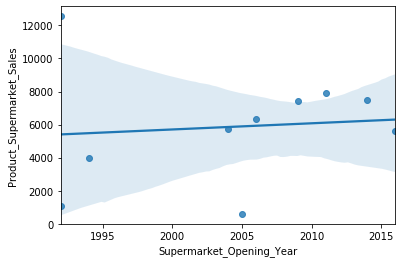

In [42]:
# Engine size as potential predictor variable of price
sns.regplot(x="Supermarket_Opening_Year", y="Product_Supermarket_Sales", data=grpd_7)
plt.ylim(0,)

In [43]:
grpd_7.corr()

,Supermarket_Opening_Year,Product_Supermarket_Sales
Supermarket_Opening_Year,1.000000,0.095753
Product_Supermarket_Sales,0.095753,1.000000


In [44]:
df.corr()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
Product_Weight,1.000000,0.027850,-0.015260,0.063841,0.037564,0.000649,0.000428,-0.005736,-0.002608,0.015314
Product_Fat_Content,0.027850,1.000000,-0.055591,-0.026270,-0.000825,-0.005549,0.004177,-0.000871,0.022995,-0.005365
Product_Shelf_Visibility,-0.015260,-0.055591,1.000000,-0.004341,-0.028941,-0.084218,0.014576,-0.086771,-0.272450,-0.161008
Product_Type,0.063841,-0.026270,-0.004341,1.000000,0.021038,0.009036,0.005978,0.011903,0.017004,0.028915
Product_Price,0.037564,-0.000825,-0.028941,0.021038,1.000000,0.161113,0.313759,0.255820,0.207156,0.524002
Supermarket_Opening_Year,0.000649,-0.005549,-0.084218,0.009036,0.161113,1.000000,0.501893,0.459908,-0.080103,0.057508
Supermarket _Size,0.000428,0.004177,0.014576,0.005978,0.313759,0.501893,1.000000,0.161019,-0.022944,0.225555
Supermarket_Location_Type,-0.005736,-0.000871,-0.086771,0.011903,0.255820,0.459908,0.161019,1.000000,0.224456,0.236921
Supermarket_Type,-0.002608,0.022995,-0.272450,0.017004,0.207156,-0.080103,-0.022944,0.224456,1.000000,0.591609
Product_Supermarket_Sales,0.015314,-0.005365,-0.161008,0.028915,0.524002,0.057508,0.225555,0.236921,0.591609,1.000000


NOT DONE WITH FEATURE ENGINEERING

In [45]:
df.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [46]:
# df.head()

In [47]:
# df2.head()

# Normalization

In [48]:
# No need for normalizing for this the Tree based algos though

# df['Product_Price']=df['Product_Price']/df['Product_Price'].max()
# df2['Product_Price']=df2['Product_Price']/df2['Product_Price'].max()

# df['Product_Weight']=df['Product_Weight']/df['Product_Weight'].max()
# df2['Product_Weight']=df2['Product_Weight']/df2['Product_Weight'].max()
# df.head()

# Assigning Dependent and Independent Variables

In [49]:
# X=df.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier','Product_Type','Product_Weight',
#            'Supermarket_Opening_Year','Product_Fat_Content','Product_Supermarket_Sales'], axis=1)

In [50]:
X=df.drop(['Product_Identifier','Product_Supermarket_Identifier','Product_Weight','Product_Supermarket_Sales'], axis=1)

In [51]:
X.head()

,Supermarket_Identifier,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,CHUKWUDI017,3,0.020694,7,382.91,2014,3,3,3
1,CHUKWUDI019,2,0.086078,15,359.53,1992,2,1,1
2,CHUKWUDI017,3,0.039517,13,609.20,2014,3,3,3
3,CHUKWUDI027,2,0.091780,13,456.32,1992,3,2,4
4,CHUKWUDI046,3,0.023735,10,258.08,2004,2,1,3


In [52]:
y=df.Product_Supermarket_Sales
y.head()

0     4633.97
1      729.05
2    14740.81
3    16137.33
4     4613.99
Name: Product_Supermarket_Sales, dtype: float64

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# GradientBoostingRegression Algo

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [151]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [152]:
reg = GradientBoostingRegressor()#**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
mse = mean_squared_error(y_train, reg.predict(X_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_train,y_train))

The mean squared error (MSE) on test set: 6978052.7162
0.6399340589860796


In [154]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_test,y_test))

The mean squared error (MSE) on test set: 9343816.5547
0.5669768463312622


In [224]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
reg = GradientBoostingRegressor(n_estimators=2000)
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = [1.0, 0.3,0.1]
max_depth = [4,6]
learning_rate = [0.1,0.05,0.02,0.01]
min_samples_leaf = [3,5,9,17]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate':learning_rate
              }

reg_randomcv=RandomizedSearchCV(reg,param_distributions=random_grid,n_iter=3,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
reg_randomcv.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [225]:
reg_randomcv.best_params_


{'min_samples_leaf': 5,
 'max_features': 0.1,
 'max_depth': 4,
 'learning_rate': 0.01}

In [226]:
reg_randomcv.best_score_

0.5471858696755487

# predicting the test data

In [155]:
# X2=df2.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier','Product_Fat_Content','Supermarket_Opening_Year'], axis=1)
# X2=pd.get_dummies(X2)
# X2.head()

In [156]:
# test_pred = reg.predict(X2) #predict on the test set for submission
# df3= {'Product_Supermarket_Identifier': df2['Product_Supermarket_Identifier'], 'Product_Supermarket_Sales': test_pred}
# sub = pd.DataFrame(data=df3)
# sub = sub[['Product_Supermarket_Identifier', 'Product_Supermarket_Sales']]

In [157]:
# sub.shape

In [158]:
# # sub.to_csv('submission.csv', index = False)

In [159]:
# subxamp=pd.read_csv('sample_submission.csv')
# subxamp.head()

# XGBRFRegressor Algo

In [160]:
from xgboost import XGBRFRegressor

In [161]:
clf = XGBRFRegressor()#random_state = 1,reg_alpha=1,n_estimators=100 ,learning_rate=1)#**params)
clf.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
mse = mean_squared_error(y_train, clf.predict(X_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(clf.score(X_train,y_train))

The mean squared error (MSE) on test set: 7481524.2777
0.6139550403501894


In [215]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(clf.score(X_test,y_test))

The mean squared error (MSE) on test set: 9180936.6113
0.5745252379717908


# XGBRegressor Algo

In [ ]:
from xgboost import XGBRegressor
parame = {"n_jobs":-1,'n_estimators':127,'learning_rate':0.08,
                    'max_depth':3,'subsample':0.9,'random_state':1,
                    'colsample_bylevel':0.9,'min_child_weight':2,
                    'reg_alpha':1
        }

clf1 = XGBRegressor()
clf1.fit(X_train, y_train)

In [166]:
#very latest best
clf1 = XGBRegressor(n_estimators=62,learning_rate=0.07,max_depth=5,
                      subsample=0.7, min_child_weight=2,reg_alpha=1)
clf1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=62, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
clf1 = XGBRegressor(n_estimators=62,learning_rate=0.07,max_depth=5,
                      subsample=0.7, min_child_weight=2,reg_alpha=0.8)
clf1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=62, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.8,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
mse = mean_squared_error(y_train, clf1.predict(X_train))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse))
print(clf1.score(X_train,y_train))


The mean squared error (MSE) on train set: 6709120.3805
0.6538109066513328


In [169]:
mse = mean_squared_error(y_test, clf1.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(clf1.score(X_test,y_test))

The mean squared error (MSE) on test set: 9125586.7604
0.5770903318864908


# catBOOST

In [171]:
from catboost import CatBoostRegressor

In [211]:
ctb = CatBoostRegressor(depth=6, learning_rate=0.019, n_estimators=270)
ctb.fit(X_train,y_train)

0:	learn: 4358.4500132	total: 5.56ms	remaining: 1.5s
1:	learn: 4317.3679198	total: 8.86ms	remaining: 1.19s
2:	learn: 4275.5881942	total: 13.5ms	remaining: 1.2s
3:	learn: 4237.7933039	total: 16.7ms	remaining: 1.11s
4:	learn: 4199.2400446	total: 20.2ms	remaining: 1.07s
5:	learn: 4160.3257766	total: 24.4ms	remaining: 1.07s
6:	learn: 4121.7248814	total: 29.7ms	remaining: 1.11s
7:	learn: 4085.4549320	total: 34ms	remaining: 1.11s
8:	learn: 4051.1234706	total: 38.2ms	remaining: 1.11s
9:	learn: 4016.1706145	total: 43ms	remaining: 1.12s
10:	learn: 3982.5301573	total: 47.3ms	remaining: 1.11s
11:	learn: 3948.8424290	total: 51.6ms	remaining: 1.11s
12:	learn: 3917.8584623	total: 71.1ms	remaining: 1.41s
13:	learn: 3886.1082792	total: 80ms	remaining: 1.46s
14:	learn: 3856.7152953	total: 96.7ms	remaining: 1.64s
15:	learn: 3827.2278033	total: 103ms	remaining: 1.63s
16:	learn: 3800.2843129	total: 107ms	remaining: 1.59s
17:	learn: 3773.0261154	total: 111ms	remaining: 1.55s
18:	learn: 3745.2554486	total: 

159:	learn: 2861.8018565	total: 957ms	remaining: 658ms
160:	learn: 2861.3116153	total: 962ms	remaining: 651ms
161:	learn: 2860.4072445	total: 968ms	remaining: 645ms
162:	learn: 2860.0835314	total: 985ms	remaining: 647ms
163:	learn: 2859.3669434	total: 992ms	remaining: 641ms
164:	learn: 2858.5291864	total: 997ms	remaining: 634ms
165:	learn: 2857.8325658	total: 1s	remaining: 627ms
166:	learn: 2857.7212084	total: 1s	remaining: 618ms
167:	learn: 2857.1591793	total: 1.01s	remaining: 612ms
168:	learn: 2856.5593848	total: 1.01s	remaining: 605ms
169:	learn: 2856.2245209	total: 1.02s	remaining: 599ms
170:	learn: 2855.5933283	total: 1.02s	remaining: 592ms
171:	learn: 2855.1304393	total: 1.03s	remaining: 585ms
172:	learn: 2854.6996527	total: 1.03s	remaining: 578ms
173:	learn: 2854.0637430	total: 1.04s	remaining: 573ms
174:	learn: 2853.6111218	total: 1.05s	remaining: 569ms
175:	learn: 2853.3103864	total: 1.05s	remaining: 563ms
176:	learn: 2852.7602865	total: 1.06s	remaining: 557ms
177:	learn: 2852

In [212]:
coeff_score = ctb.score(X_test,y_test)
coeff_score

0.572592870483724

In [209]:
ctb.score(X_train,y_train)

0.5934237029090792

In [210]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# model = CatBoostRegressor()
# parameters = {'depth'         : [6,8,10],
#                   'learning_rate' : [0.01, 0.02, 0.03, 0.04,0.5, 0.06,0.07,0.08,0.09,0.1],
#                   'n_estimators':[90,125,150,200,250,300,350]
#                  }
# grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
# grid.fit(X,y)



In [189]:
# # Results from Grid Search
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid.best_params_)
# print("\n ====================")

# predicting the test data

In [213]:
X2=df2.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier','Product_Type','Product_Weight',
           'Supermarket_Opening_Year','Product_Fat_Content'], axis=1)
X2.head()

,Product_Shelf_Visibility,Product_Price,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0.178246,395.32,3,1,3
1,0.061434,327.49,3,2,2
2,0.020573,391.16,2,3,3
3,0.080131,427.28,3,2,2
4,0.028710,395.40,3,3,3


In [214]:
test_pred = ctb.predict(X2) #predict on the test set for submission
df3= {'Product_Supermarket_Identifier': df2['Product_Supermarket_Identifier'], 'Product_Supermarket_Sales': test_pred}
sub = pd.DataFrame(data=df3)
sub = sub[['Product_Supermarket_Identifier', 'Product_Supermarket_Sales']]

sub.to_csv('submission_recent2.csv', index = False)
sub.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDC15_CHUKWUDI049,6067.513607
1,NCY06_CHUKWUDI018,4550.491348
2,DRB24_CHUKWUDI035,7023.887896
3,NCG54_CHUKWUDI018,6061.489532
4,NCA42_CHUKWUDI017,6442.460982


Croos validation